In [135]:
#https://www.investopedia.com/terms/d/dmi.asp
#The larger the spread between the two lines, the stronger the price trend. If +DI is way above -DI the price trend is strongly up. 
#If -DI is way above +DI then the price trend is strongly down.
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook

In [136]:
start='2016-1-1'
end='2020-3-31'
period = 14 #default 14

In [137]:
df = data.DataReader('NFLX', 'yahoo', start, end)

#https://school.stockcharts.com/doku.php?id=technical_indicators:average_directional_index_adx
df['+DM'] = abs(df['High'] - df['High'].shift(1))
df['-DM'] = abs(df['Low'].shift(1) - df['Low'])
df['TR'] = np.nan
df['smooth_TR'] = np.nan
df['ADX'] = np.nan
df['smooth_+DM'] = np.nan
df['smooth_-DM'] = np.nan

for i in range(len(df['Close'])):
    df.loc[[df.index[i]], ['TR']] = np.max([ df['High'][i] - df['Low'][i], 
                               abs(df['High'][i] - df['Close'][i-1]), 
                               abs(df['Low'][i] - df['Close'][i-1]) ])
df.loc[[df.index[0]], ['TR']] = np.nan

df.loc[df.index[period], ['smooth_TR']] = 0
for i in range(1, period+1):
    df.loc[df.index[period], 'smooth_TR'] += df['TR'][i]
for i in range(period+1, len(df)):
    df.loc[df.index[i], 'smooth_TR'] = df['smooth_TR'][i-1] - (df['smooth_TR'][i-1] / period) + df['TR'][i]

In [142]:
df['+DI'] = np.nan
df['-DI'] = np.nan
df['smooth_+DI'] = np.nan
df['smooth_-DI'] = np.nan

for i in range(len(df)):
    if df['+DM'][i] < 0:
        df.loc[df.index[i], ['+DI']] = 0
    elif df['+DM'][i] > df['-DM'][i]:
        df.loc[df.index[i], ['+DI']] = df['+DM'][i]
    else:
        df.loc[df.index[i], ['+DI']] = 0
        
    if df['-DM'][i] < 0:
        df.loc[df.index[i], ['-DI']] = 0
    elif df['-DM'][i] > df['+DM'][i]:
        df.loc[df.index[i], ['-DI']] = df['-DM'][i]
    else:
        df.loc[df.index[i], ['-DI']] = 0
        
df.loc[df.index[period], ['smooth_+DI']] = 0
for i in range(1, period+1):
    df.loc[df.index[period], 'smooth_+DI'] += df['+DI'][i]
for i in range(period+1, len(df)):
    df.loc[df.index[i], 'smooth_+DI'] = df['smooth_+DI'][i-1] - (df['smooth_+DI'][i-1] / period) + df['+DI'][i]
    
df.loc[df.index[period], ['smooth_-DI']] = 0
for i in range(1, period+1):
    df.loc[df.index[period], 'smooth_-DI'] += df['-DI'][i]
for i in range(period+1, len(df)):
    df.loc[df.index[i], 'smooth_-DI'] = df['smooth_-DI'][i-1] - (df['smooth_-DI'][i-1] / period) + df['-DI'][i]
'''   
df.loc[df.index[period], ['smooth_+DM']] = 0
for i in range(1, period+1):
    df.loc[df.index[period], 'smooth_+DM'] += df['+DM'][i]
for i in range(period+1, len(df)):
    df.loc[df.index[i], 'smooth_+DM'] = df['smooth_+DM'][i-1] - (df['smooth_+DM'][i-1] / period) + df['+DM'][i]
    
df.loc[df.index[period], ['smooth_-DM']] = 0
for i in range(1, period+1):
    df.loc[df.index[period], 'smooth_-DM'] += df['-DM'][i]
for i in range(period+1, len(df)):
    df.loc[df.index[i], 'smooth_-DM'] = df['smooth_-DM'][i-1] - (df['smooth_-DM'][i-1] / period) + df['-DM'][i]
df['smooth_+DI'] = df['smooth_+DM'] / df['smooth_TR'] * 100
df['smooth_-DI'] = df['smooth_-DM'] / df['smooth_TR'] * 100

'''

"   \ndf.loc[df.index[period], ['smooth_+DM']] = 0\nfor i in range(1, period+1):\n    df.loc[df.index[period], 'smooth_+DM'] += df['+DM'][i]\nfor i in range(period+1, len(df)):\n    df.loc[df.index[i], 'smooth_+DM'] = df['smooth_+DM'][i-1] - (df['smooth_+DM'][i-1] / period) + df['+DM'][i]\n    \ndf.loc[df.index[period], ['smooth_-DM']] = 0\nfor i in range(1, period+1):\n    df.loc[df.index[period], 'smooth_-DM'] += df['-DM'][i]\nfor i in range(period+1, len(df)):\n    df.loc[df.index[i], 'smooth_-DM'] = df['smooth_-DM'][i-1] - (df['smooth_-DM'][i-1] / period) + df['-DM'][i]\ndf['+DI'] = df['smooth_+DM'] / df['smooth_TR'] * 100\ndf['-DI'] = df['smooth_-DM'] / df['smooth_TR'] * 100\n\n"

In [143]:
df['DX'] = abs(df['smooth_+DI'] - df['smooth_-DI']) / (df['smooth_+DI'] + df['smooth_-DI']) * 100

df.loc[df.index[2*period-1], ['ADX']] = 0
for i in range(period, 2*period):
    df.loc[df.index[2*period-1], 'ADX'] += df.loc[df.index[i], 'DX']
df.loc[df.index[2*period-1], ['ADX']] = df['ADX'][2*period-1] / period
for i in range(2*period, len(df)):
    df.loc[df.index[i], 'ADX'] = (df['ADX'][i-1] * (period-1) + df['DX'][i]) / period
    
df['ADXR'] = df['ADX'].rolling(window=period+1).mean()

In [144]:
#https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/adx
#Wilder suggests that a strong trend is present when ADX is above 25 and no trend is present when below 20.

<IPython.core.display.Javascript object>


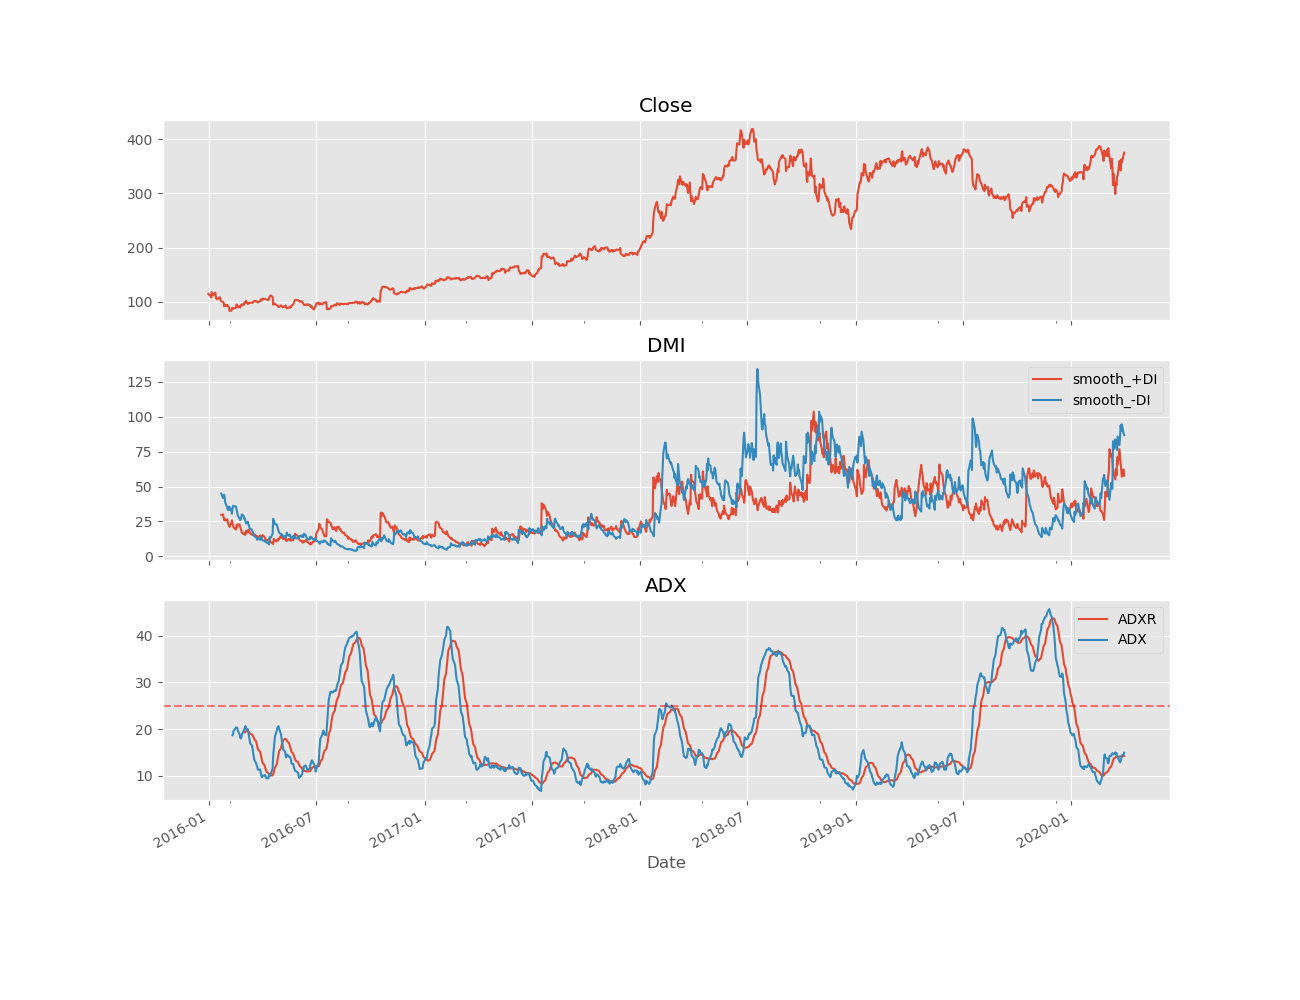

In [146]:
fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(13,10),sharex=True)

df['Close'].plot(ax=axes[0]); axes[0].set_title('Close')
df[['smooth_+DI', 'smooth_-DI']].plot(ax=axes[1]); axes[1].set_title('DMI')
df[['ADXR', 'ADX']].plot(ax=axes[2]); axes[2].set_title('ADX'); axes[2].axhline(25, linestyle='--', alpha = 0.5, color = 'red')
plt.show()